In [1]:
import bs4
import urllib
import requests
import pandas as pd

In [2]:
headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.84 Safari/537.36"}
request = urllib.request.Request('https://www.realtor.com/realestateandhomes-detail/5422-Nottinghamshire-Ln_Westerville_OH_43081_M38030-25548', headers=headers)
source = urllib.request.urlopen(request).read()

In [3]:
soup = bs4.BeautifulSoup(source,'html.parser')

<!DOCTYPE html>

<html lang="en">
<head>
<link href="https://static.rdc-next-basecamp.rdc.moveaws.com/assets/favicon-144287b492113455703667bc3182768a9b2666765a1cd4beba38cfe40294eccc.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=com.move.realtor" name="google-play-app"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
<meta content="Browse photos and price history of this 2 bed, 2 bath, 1,466 Sq. Ft. recently sold home at 5422 Nottinghamshire Ln, Westerville, OH 43081 that sold on May 20, 2020  for Last Sold for $179,900" name="description">
<meta content="Browse photos and price history of this 2 bed, 2 bath, 1,466 Sq. Ft. recently sold home at 5422 Nottinghamshire Ln, Westerville, OH 43081 that sold on May 20, 2020  for Last Sold for $179,900" name="twitter:description">
<meta content="Browse photos and price history of this 2 bed, 2 bath, 1,466 Sq. Ft
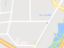
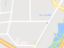

In [4]:
print(soup)

In [14]:
# this gets all the house info, we will need to see if the terms are uniform and if
# so we can very easily just clean them up and assign them to vairables
house_details = soup.find('ul', {'class': "list-default row"})
features = [feature.text for feature in house_details.find_all('li')]
print(features)

['Beds: 2', 'Rooms: 5', 'House size: 1,466 sq ft', 'Stories: 1', 'Lot size: 2323', 'Garage: Attached Garage', 'Heating: Unknown', 'Cooling: Unknown', 'Year built: 2011', 'Year renovated: 2011', 'Property type: Condo', 'Style: Condo/Apartment', 'Date updated: 05/09/2020']


In [29]:
# WE ARE SAYING TO REMOVE SCHOOL DISTRICT

# this gets the school district, NOT WORKNG RN
school_dist = soup.find('ul', {"class", "list-default list-prop-details-schools"})
print(school_dist)

# this gets the school district, NOT WORKNG RN
school_dist = soup.find('div', {"id", "ldp-detail-schools"})
print(school_dist)

school_dist = soup.find('div', {"class", "margin-top-lg clearfix details-load-more details-more-placeholder"})
print(school_dist)


None
None
<div class="margin-top-lg clearfix details-load-more details-more-placeholder">
<p class="word-wrap-break" id="ldp-detail-romance">
<span class="font-bold">Property Overview</span> - If you are looking for an adorable 1st floor condo, located in the gated community of The Reserve at Preston Woods, look no further! You won't be disappointed with the modern, open floor plan, gas fireplace surrounded by beautiful built-ins, main floor laundry and a 1 car attached garage! The additional den could easily be used as an office or even a 3rd bedroom if necessary! The kitchen comes equipped with a newer stainless steel refrigerator, microwave &amp; dishwasher. All new laminate flooring was installed in the living room, kitchen &amp; dining room. The master bath has been updated with a tiled shower and the master bedroom includes a large walk-in closet. The oversized double French doors lead you out to the screened in patio area with a private, park-like setting to enjoy the fresh outd

In [25]:
# This tells address and selling price, we will need to clean up the strings in both 
house_info = soup.find('ul', {'class', "gallery-address list-horizontal list-style-disc"})
features = [feature.text for feature in house_info.find_all('li')]
print(features)

['\n5422 Nottinghamshire Ln,\n                          Westerville\n', '\n                        Last Sold for $179,900\n                      ']
